# Interactive Functions 

In [1]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup, summarize, show_query, arrange, collect

import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl

In [5]:
#! pip install plotnine

In [2]:
from plotnine import *

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [4]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/clean_obligated_waiting.csv', low_memory=False)

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:73: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/


#### Dropping the duplicates

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

Dropping some columns to have the basic information in the function table

In [8]:
df = df.drop(['Unnamed: 0',
              'submit__to_hq_date',
              'hq_review_date',
              'submit_to_fhwa_date',
              'to_fmis_date',
              'status',
              'dist_processing_days',
              'hq_processing_days',
              'fhwa_processing_days',
              'date_request_initiated',
              'date_completed_request',
              'warning'], axis=1)


In [9]:
df = df.drop(['location',
              'projectID',
              'projectNO',
              'compare_id_locode'], axis=1)

In [10]:
cols = ['prepared_date']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))

In [11]:
df.sample(5)

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo
8138,RPSTP,5933(112),Alameda County,2015-10-07,0.00,0.00,3333.33,Authorized,5933,4,ALA050035,"Grove Way Between Meekland And Western Blvd. ,...",Sidewalk Improvements,4,MTC
14995,HSIP,5416(010),Marina,2019-10-08,-19.60,0.00,0.00,Authorized,5416,5,HSIP08,Del Monte And Beach Road Roundabout,Construct Roundabout,3,AMBAG
5648,CMLNI,5287(037),Wasco,2016-10-13,-22106.05,0.00,-24970.77,Authorized,5287,6,KER140523,City Of Wasco,Purchase Cng Refuse Truck,2,KCOG
12007,BPMPL,5940(111),Mariposa,2014-04-10,60000.00,0.00,60000.00,Authorized,NaN,10,HBP-STWD,Multiple Locations (county Bridges),Preventive Maintenance (tc),1,STANCOG
5552,HSIP,5928(118),Contra Costa County,2016-10-27,510000.00,0.00,730821.00,Authorized,5928,4,VAR110007,Alhambra Valley Road Between Rancho La Boca Rd...,Shoulder Widening / Roadway Reconstruction,2,MTC


In [12]:
df['prepared_y'] = pd.to_datetime(df["prepared_date"].dt.strftime('%Y'))

In [13]:
df.sample(5)

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
4116,CML,5942(254),Fresno County,2017-04-04,2580541.00,0.00,3258026.00,Authorized,5942,6,FRE150026,Kamm Avenue From State Route 145 To Jansen Avenue,Shoulder Improvements,2,CFCG,2017-01-01
13744,PRNSL,5109(242),Bakersfield,2019-04-29,0.00,0.00,239100.00,Authorized,5109,6,KER050104,Kern County In The City Of Bakersfield On Rte ...,"Construct Auxiliary Lane, Reconstruct Overcros...",2,KCOG,2019-01-01
6865,CML,5925(130),El Dorado County,2016-03-29,230952.00,0.00,819819.00,Authorized,5925,3,ELD19364,El Dorado Trail From Los Trampas Dr To Halcon Rd,Ped/bike Path (tc),4,SACOG,2016-01-01
17949,ACST-ER,32L0(015),Santa Cruz County,2020-09-28,0.00,514785.00,581482.00,Authorized,5936,5,NaN,In The County Of Santa Cruz On North Rodeo Gul...,Stabilize Slope And Reconstruct Roadway,4,AMBAG,2020-01-01
7093,BRLS,5937(123),Santa Clara County,2016-03-28,309855.00,0.00,350000.00,Authorized,5937,4,VAR110045,"Uvas Rd Over Uvas Creek, Bridge 37c0094",Bridge Replacement,5,MTC,2016-01-01


In [68]:
df.to_csv('function_data.csv')

In [14]:
#importing inerctive functions

In [15]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Parts of the Function

creating a test function for the creation of the table. Want to be able to filter using the agency and the prefix 

In [16]:
def table_dla(agency=df.agency.unique().tolist(),
             prefix=df.prefix.unique().tolist()):
    display(df[(df.agency == agency)&(df.prefix == prefix)].sample(10))

In [17]:
# we know Humboldt County has many ER obligations, so we will use that to test the function
table_dla(agency='Humboldt County', prefix='ER')

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
1262,ER,20A0(008),Humboldt County,2018-06-14,0.00,0.00,0.00,Authorized,5904,1,NaN,"Alderpoint Road, Pm 14.10",Storm Damage Restoration,5,NON-MPO,2018-01-01
263,ER,32L0(130),Humboldt County,2018-10-30,36313.21,0.00,40799.95,Authorized,5904,1,NaN,Mattole Rd Pm 11.13,Permanent Restoration,1,NON-MPO,2018-01-01
17509,ER,32L0(114),Humboldt County,2020-09-16,1212129.73,0.00,1369174.00,Authorized,5904,1,NaN,Mattole Road Pm 36.06-36.10,Permanent Restoration,4,NON-MPO,2020-01-01
16327,ER,4400(029),Humboldt County,2020-04-14,-1.04,0.00,0.00,Authorized,5904,1,NaN,Alderpoint Road Pm 22.45/22.45,Storm Damage,6,NON-MPO,2020-01-01
14412,ER,32L0(224),Humboldt County,2019-08-21,-663.98,0.00,-750.00,Authorized,5904,1,NaN,Mattole Road Pm 35.65,Permanent Restoration,2,NON-MPO,2019-01-01
14882,ER,32L0(270),Humboldt County,2019-10-07,39838.50,-39838.50,0.00,Authorized,5904,1,NaN,Alderpoint Road 2.70,Permanent Restoration,3,NON-MPO,2019-01-01
1197,ER,20A0(017),Humboldt County,2018-06-25,0.00,0.00,0.00,Authorized,5904,1,NaN,"Alderpoint Road, Pm 36.98",Permanent Restoration,5,NON-MPO,2018-01-01
2023,ER,20A0(054),Humboldt County,2018-03-29,13732.05,0.00,15511.11,Authorized,5904,1,NaN,"Mattole Road, Pm 14.60",Storm Damage Restoration,2,NON-MPO,2018-01-01
19021,ER,32L0(253),Humboldt County,2021-04-27,0.00,0.00,0.00,Authorized,5904,1,NaN,In Humboldt County On Mattole Road Pm 16.15 Pr,Permanent Restoration,2,NON-MPO,2021-01-01
16320,ER,32L0(160),Humboldt County,2020-02-28,-42357.63,0.00,-24148.61,Authorized,5904,1,NaN,"Shelter Cove Rd Pm 7.60, Humboldt County","Emergency Opening, Disaster 17-2",3,NON-MPO,2020-01-01


In [18]:
#making the function interactive

@interact

def table_dla(agency=df.agency.unique().tolist(),
             prefix=df.prefix.unique().tolist()):
    display(df[(df.agency == agency)&(df.prefix == prefix)].sample(10))
    
    

interactive(children=(Dropdown(description='agency', options=('Humboldt County', 'Mendocino County', 'Sacramen…

### Making the graph part of the function

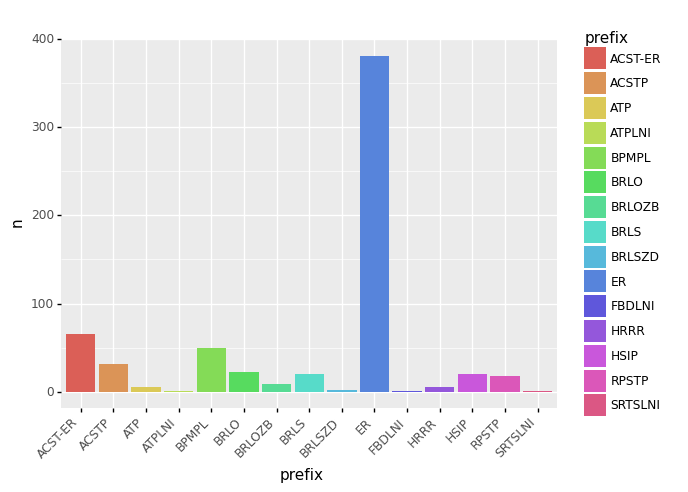

<ggplot: (8737596592987)>

In [19]:
#what we are trying to get using ggplot and Siuba filtering
(df
    >> filter(_.agency.str.contains('Humboldt County'))
    >> count(_.prefix) 
    >> arrange(-_.n)
    >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)

#### Subsetting a prefix count

using a mix of siuba and pandas for a subset df of our example Humboldt County

In [20]:
agencies = df[df.agency=='Humboldt County']

In [21]:
prefix_count_n = agencies >> count(_.prefix) 

In [22]:
prefix_count_n

,prefix,n
0,ACST-ER,65
1,ACSTP,31
2,ATP,5
3,ATPLNI,1
4,BPMPL,50
5,BRLO,22
6,BRLOZB,9
7,BRLS,20
8,BRLSZD,2
9,ER,381


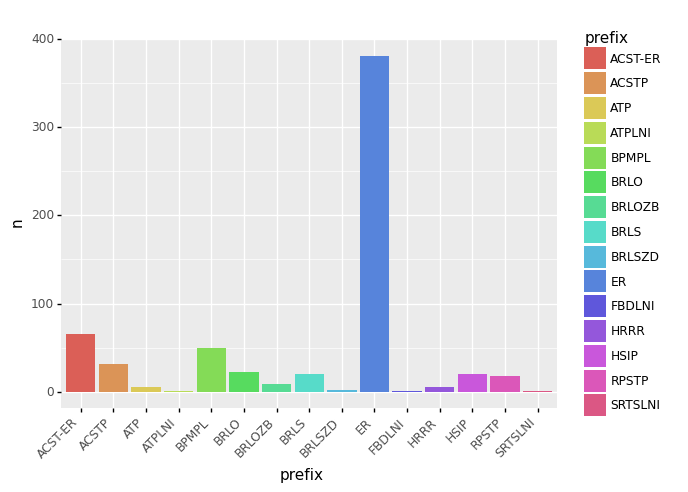

<ggplot: (8737596593038)>

In [23]:

ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    )
ax1

* great! got the ggplot working with the sub dataframe

### Trying the function now

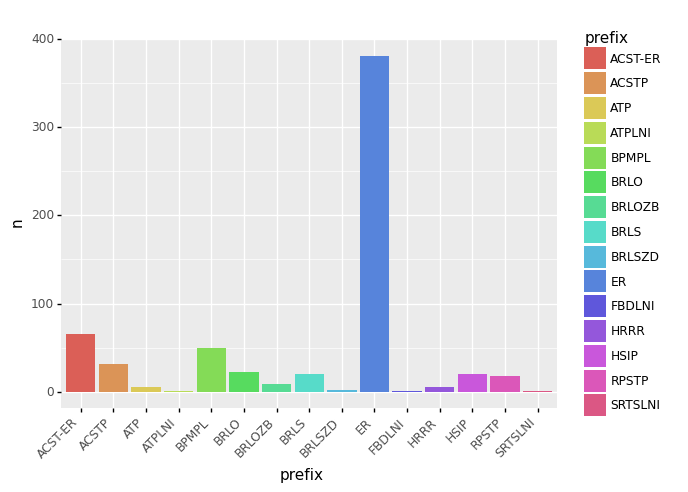

<ggplot: (8737596406489)>

In [24]:
# essentially what we want the function to do in one cell block: 

agencies = df[df.agency=='Humboldt County']
    
prefix_count_n = agencies >> count(_.prefix) 
    
ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)
ax1


In [25]:
def dla_graphs(place='Humboldt County'):
    
    agencies = df[df.agency==place]
    
    prefix_count_n = agencies >> count(_.prefix) 
    
    ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    )
    return ax1

                                    
                

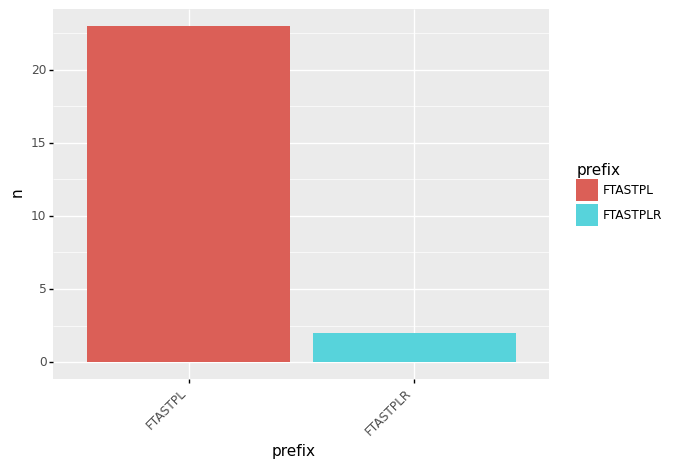

<ggplot: (8737596331255)>

In [26]:
dla_graphs(place='Access Services')

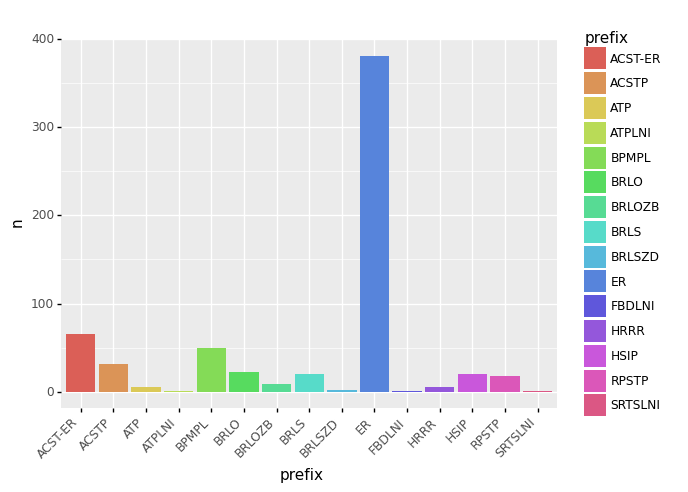

<ggplot: (8737596343661)>

In [27]:
dla_graphs(place='Humboldt County')

In [28]:
#add interact 

@interact
def dla_graphs_prefix(place=df.agency.unique().tolist()):
    
    agencies = df[df.agency==place]
    
    prefix_count_n = agencies >> count(_.prefix) 
    
    ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    )
    return ax1

                 

interactive(children=(Dropdown(description='place', options=('Humboldt County', 'Mendocino County', 'Sacrament…

* GOT IT. now adding a sample table of some of the data

## Full Function for Prefix

In [29]:
    @interact
    
    def dla_get_prefix(place=df.agency.sort_values().unique().tolist()):
        # for the table- using one as some agencies only have one entry
        display(df[df.agency == place].sample()) 
    
        # graphs 
    
        agencies = df[df.agency==place]
    
        prefix_count_n = agencies >> count(_.prefix) 
    
        ax1 = (prefix_count_n
            >> ggplot(aes("prefix", "n", fill="prefix")) 
               + geom_col() 
               + theme(axis_text_x = element_text(angle = 45 , hjust=1))
               + labs(title='Agency Program Codes', x='Program Codes', y='Number of Obligations', fill="Program Type")
        )
        return ax1

        

interactive(children=(Dropdown(description='place', options=('Access Services', 'Agoura Hills', 'Ala-Con Costa…

##### Exporting to HTML

In [30]:

from ipywidgets.embed import embed_minimal_html 

In [31]:
dla_agency_prefix_link = interact(dla_get_prefix)

interactive(children=(Dropdown(description='place', options=('Access Services', 'Agoura Hills', 'Ala-Con Costa…

* might consider using dash https://towardsdatascience.com/dash-for-beginners-create-interactive-python-dashboards-338bfcb6ffa4

## Function for results by Prefix

#### getting the table 

In [32]:
df.prefix.sort_values().unique().tolist()

['6140000',
 'ACNHPI',
 'ACST-ER',
 'ACSTP',
 'ASCTP',
 'ATCMTD',
 'ATF5512',
 'ATP',
 'ATPCML',
 'ATPHIPL',
 'ATPHSIP',
 'ATPLN',
 'ATPLNI',
 'ATPLSB1',
 'ATPNIL',
 'ATPSB1',
 'ATPSB1L',
 'ATPSTC',
 'ATPSTCML',
 'ATPSTPL',
 'BDGL',
 'BGFL',
 'BHL',
 'BHLO',
 'BHLOZ',
 'BHLOZD',
 'BHLS',
 'BHLSCR',
 'BHLSP',
 'BHLSZ',
 'BHLSZD',
 'BPMPL',
 'BR',
 'BR-NBISL',
 'BRCMLO',
 'BRHIPL',
 'BRIM',
 'BRL',
 'BRLKS',
 'BRLNS',
 'BRLO',
 'BRLOZ',
 'BRLOZA',
 'BRLOZB',
 'BRLOZE',
 'BRLRT',
 'BRLS',
 'BRLSN',
 'BRLSZ',
 'BRLSZA',
 'BRLSZD',
 'BRLZ',
 'BRNBIF',
 'BRNBISL',
 'BROS',
 'BUILDL',
 'CASB',
 'CFLBRLO',
 'CMAQL',
 'CMESPL',
 'CMFERP',
 'CMFERP16',
 'CMHIPL',
 'CMHPLU',
 'CMHPLULN',
 'CMHRL',
 'CMHSIPL',
 'CML',
 'CMLFSP',
 'CMLFSP18',
 'CMLFTA',
 'CMLG',
 'CMLGNI',
 'CMLHPL',
 'CMLN',
 'CMLNGI',
 'CMLNI',
 'CMLSBCG',
 'CMLSTBGL',
 'CMRPSTPL',
 'CMSTPL',
 'CMSTPLN',
 'CMSTPLNI',
 'CMTCIFL',
 'CMTCIFLN',
 'CMTLSP',
 'CRDL',
 'CRP',
 'CRRSAA',
 'DBF',
 'DBPL02',
 'DE',
 'DEM',
 'DEM04L',
 'DEM

In [33]:
display(df[(df.prefix == 'CML')].sample(10))

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
1790,CML,5059(176),Modesto,2018-04-27,0.00,0.00,0.00,Authorized,5059,10,VA01,Eb Bangs Ave. To Sb Prescott Road,Construct A Right Turn Lane,6,STANCOG,2018-01-01
8086,CML,5196(030),Daly City,2015-10-07,0.00,0.00,700224.96,Authorized,5196,4,SM-050046,Mission Street,Pedestrian Improvements,7,MTC,2015-01-01
6323,CML,5208(147),Clovis,2016-06-22,207700.00,0.00,207700.00,Authorized,5208,6,FRE130027,"Shaw Ave, From Temperance Ave To Sunnyside Ave",Sidewalks & Ada Ramps (tc),2,CFCG,2016-01-01
7178,CML,5227(051),Delano,2016-03-08,746816.00,0.00,844652.00,Authorized,5227,6,KER140521,Ellington St. Between Cecil Ave. And 9th Ave. ...,"Construction Of Shoulders, Curb, And Gutter",1,KCOG,2016-01-01
17272,CML,6164(021),Coachella Valley Association Of Governments,2020-07-23,13315000.00,0.00,20663839.00,Authorized,6164,8,RIV140820,Throughout The Coachella Valley,Signal Synchronization,2,SCAG,2020-01-01
14987,CML,6084(164),Metropolitan Transportation Commission,2019-07-02,-235005.84,0.00,-235005.84,Authorized,6084,4,REG090065,San Francisco Bay Area,Climate Initiatives Program Public Education (tc),7,MTC,2019-01-01
9308,CML,5942(255),Fresno County,2015-04-28,0.00,0.00,0.00,Authorized,5942,6,FRE150025,Panoche Road From Sr 33 To San Benito Avenue,Shoulder Improvements,2,CFCG,2015-01-01
18040,CML,5961(004),Kern County (District 9),2020-12-18,0.00,0.00,0.00,Authorized,5961,9,NaN,"In Kern County, Community Of Mojave, On A Parc...",Construct A Transit Center With Asphalt And Co...,3,KCOG,2020-01-01
19963,CML,5452(017),Hesperia,2021-08-17,274000.00,0.00,585357.83,Authorized,5452,8,20084104,Southwest Corner Of The Intersection Of Joshua...,Park And Ride Lot Expansion (tc),3,SCAG,2021-01-01
18059,CML,5169(050),El Centro,2021-01-19,-37281.86,0.00,45406.91,Authorized,5169,11,IMP160409,Dogwood Road And Danenberg Avenue,Traffic Signal Synchronization,5,SCAG,2021-01-01


In [34]:
def prefix_table_dla(prefix=df.prefix.sort_values().unique().tolist()):
    display(df[(df.prefix == 'CML')].sample(1))


In [35]:
prefix_table_dla(prefix = 'CML')

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
12015,CML,5168(026),Calexico,2013-07-02,261000.00,0.00,294816.00,Authorized,NaN,11,IMP120617,Purchasing Vehicle,Purchase Of One Cng Street Sweeper,1,SJCOG,2013-01-01


#### getting the graph 

In [36]:
prefixes = df[df.prefix== 'CML']

In [37]:

prefix_count = prefixes >> count(_.agency)
    

In [38]:
prefix_count_subset = prefixes.agency.value_counts().iloc[:20].index

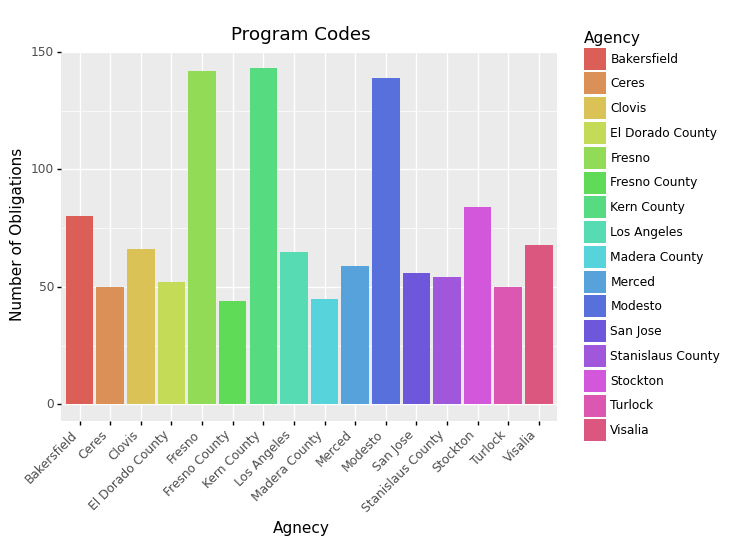

<ggplot: (8737596193094)>

In [39]:
(prefix_count
    >> filter(_.n > 40)
    >> ggplot(aes("agency", "n", fill="agency")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + labs(title='Program Codes', x='Agnecy', y='Number of Obligations', fill="Agency")
)

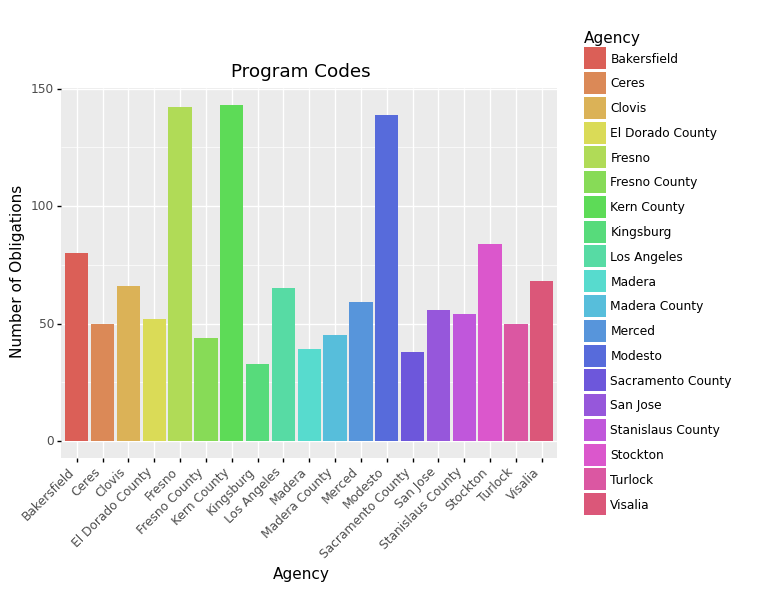

<ggplot: (8737596103223)>

In [40]:
(prefix_count
    >> filter(_.n > 30)
    >> ggplot(aes("agency", "n", fill="agency")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + labs(title='Program Codes', x='Agency', y='Number of Obligations', fill="Agency")
)

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
11735,CML,5042(054),Napa,2014-05-13,0.00,0.00,0.00,Authorized,5042,4,NAP110013,Napa City North/south Bike Location,Class Ii Bike Lanes,3,MTC,2014-01-01


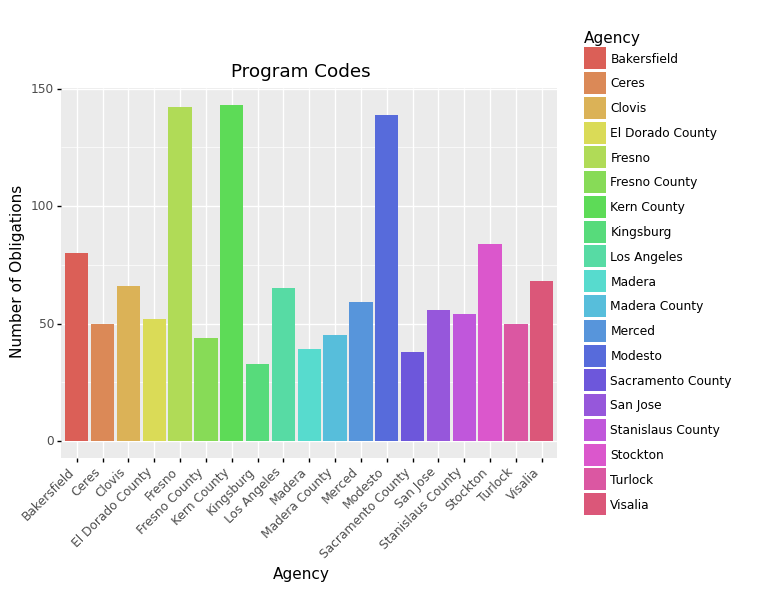

<ggplot: (8737596008578)>

In [41]:
    
display(df[(df.prefix == 'CML')].sample(1))
    
    # graphs 
prefixes = df[df.prefix== 'CML']
    #prefixes = df[df.prefix==prefix]
    
prefix_count = prefixes >> count(_.agency)
    
ax1 = (prefix_count
        >> filter(_.n > 30)
        >> ggplot(aes("agency", "n", fill="agency")) 
            + geom_col() 
            + theme(axis_text_x = element_text(angle = 45 , hjust=1))
            + labs(title='Program Codes', x='Agency', y='Number of Obligations', fill="Agency")
        )    
ax1

### Prefix Function

* Still getting an error on the function for programs that do not have more than 20 entries. If we do not limit the number of entries, the chart becomes unreadable

In [42]:
df2 = df.loc[df.prefix.isin(['ATP','CML','STP','HSIP','BRLO','ER','BRLS'])]

In [43]:
@interact
def prefix_agencies(prefix=df2.prefix.sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = prefixes >> count(_.agency) >> filter(_.n > 20)
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=('ATP', 'BRLO', 'BRLS', 'CML', 'ER', 'HSIP', 'STP…

* Works with prefixes over many agencies. does not work with prefixes that do not have more than 30 agencies

In [44]:
interact(prefix_agencies)

interactive(children=(Dropdown(description='prefix', options=('ATP', 'BRLO', 'BRLS', 'CML', 'ER', 'HSIP', 'STP…

<function __main__.prefix_agencies(prefix=['ATP', 'BRLO', 'BRLS', 'CML', 'ER', 'HSIP', 'STP'])>

* The following function works for all agencies, although it becomes unreadable for the most used prefixes (in the function above).

In [45]:
#function for all agencies
@interact
def prefix_all_agencies(prefix=df.prefix.sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = prefixes >> count(_.agency) 
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=('6140000', 'ACNHPI', 'ACST-ER', 'ACSTP', 'ASCTP'…

#### Fixing function 
trying to get the top 10 prefix values for each agency if they have more than 30 prefixes

------------------ OR -----------------------

get a list of just the agencies that have more than 10

In [46]:
agency_prefix_count = df['agency'].groupby(df['prefix']).value_counts()

In [47]:
agency_prefix_count.head()


prefix   agency                
6140000  Kern County                2
ACNHPI   Ora Co Trans Au            1
         Sunline Transit Agency     1
ACST-ER  Santa Cruz County         74
         Humboldt County           65
Name: agency, dtype: int64

In [48]:
df >> group_by(_.prefix) >> count (_.agency) 

,prefix,agency,n
0,6140000,Kern County,2
1,ACNHPI,Ora Co Trans Au,1
2,ACNHPI,Sunline Transit Agency,1
3,ACST-ER,Alameda County,2
4,ACST-ER,Benicia,3
...,...,...,...
3189,VPPP,Santa Clara County,1
3190,VPPP,Santa Clara Valley Transportation Authority,2
3191,VPPP,Southern California Association Of Governments,3
3192,VPPTCS,"City & County Of San Francisco, Mta/Parking & ...",1


In [49]:
#https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column/48590361
n = 30
df['prefix'].value_counts()[:n].index.tolist()

['HSIP',
 'CML',
 'STP',
 'ER',
 'BRLO',
 'BRLS',
 'ATP',
 'BPMPL',
 'RPSTP',
 'SRTS',
 'HPLUL',
 'FTACML',
 'ACSTP',
 'HRRR',
 'BHLS',
 'CMLNI',
 'ACST-ER',
 'STPLZ',
 'FTASTPL',
 'STPLN',
 'STPCML',
 'BHLO',
 'BRLSZD',
 'HP21L',
 'SRTSLNI',
 'CMLN',
 'STPLNI',
 'ATPCML',
 'BR',
 'FERPL']

Adding the `[:n]` does not limit the number of entries. 

##### attempt 3

In [50]:
@interact
def prefix_agencies_3(prefix=df.prefix.value_counts()[:50].sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = prefixes >> count(_.agency) >> filter(_.n > 20)
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=(19, 21, 22, 23, 24, 25, 29, 31, 32, 38, 39, 40, …

##### attempt 4

In [59]:
prefixes = df[df.prefix== 'HSIP']

In [64]:
prefix_count = (prefixes >> count(_.agency) >> arrange(-_.n)).head(5)

In [65]:
prefix_count

,agency,n
251,Stockton,92
120,Los Angeles,77
121,Los Angeles County,77
74,Fresno,64
157,Orange,57


In [70]:
@interact
def prefix_all_agencies_4(prefix=df.prefix.sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = (prefixes >> count(_.agency) >> arrange(-_.n)).head(5)
    display(prefix_count)
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Top 5 Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=('6140000', 'ACNHPI', 'ACST-ER', 'ACSTP', 'ASCTP'…